## 🧠 0. Prerequisite: Understand Tensors

**Goal**: Get comfortable with PyTorch’s core data structure.

In [8]:
import torch

# Create tensors
a = torch.tensor([1.0, 2.0])
b = torch.tensor([3.0, 4.0])

# Basic operations
print(a + b)
print(a * b)
print(a @ b)  # Dot product (1 * 3 + 2 * 4)
print(a.sum())
print(a.prod())
print(a.mean())
print(a.std()) # Standard deviation

tensor([4., 6.])
tensor([3., 8.])
tensor(11.)
tensor(3.)
tensor(2.)
tensor(1.5000)
tensor(0.7071)


## 1. 🚀 Linear Regression (Manual)

**Goal**: Understand gradients and backprop manually.

In [12]:
# We're manually fitting a line to data using the mean squared error loss and gradient descent.

x = torch.arange(0, 10, dtype=torch.float32).unsqueeze(1)
# - Create a tensor with values [0, 1, 2, ..., 9]
# - .unsqueeze(1) makes it shape [10, 1] (so it's a column vector)

y = 2 * x + 1
# This is our ground truth — y is generated using the rule y = 2x + 1

w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
# Randomly initialize weights (w) and bias (b)
# requires_grad=True tells PyTorch to track gradients for them

lr = 0.01
# Learning rate — how much we adjust w and b during each step

# 🔁 Training loop
for epoch in range(100): 
# Loop over the training process 100 times (epochs)

    # 🔮 1. Predict
    y_pred = w * x + b
    # - Compute predictions based on current guess of w and b

    # 📉 2. Compute Loss
    loss = ((y - y_pred) ** 2).mean()
    # - Compute mean squared error between true y and predicted y

    # 🔁 3. Backpropagation
    loss.backward()
    # - PyTorch computes gradients of loss w.r.t. w and b

    # ✏️ 4. Gradient Descent Update
    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad
        # - Apply gradient descent: update w and b in the opposite direction of the gradient

        w.grad.zero_()
        b.grad.zero_()
        # - Reset gradients to zero for the next iteration (or they’d accumulate)

    # 🖨️ 5. Print Loss Occasionally
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss={loss.item():.4f}")
        # Show training progress every 10 epochs

Epoch 0: Loss=86.2150
Epoch 10: Loss=0.1810
Epoch 20: Loss=0.1616
Epoch 30: Loss=0.1443
Epoch 40: Loss=0.1289
Epoch 50: Loss=0.1151
Epoch 60: Loss=0.1027
Epoch 70: Loss=0.0917
Epoch 80: Loss=0.0819
Epoch 90: Loss=0.0731


## ✅ Full Example: Manual Linear Regression + Visualization

Epoch 0 | Loss = 631.2076 | w = 0.4570, b = -1.5774


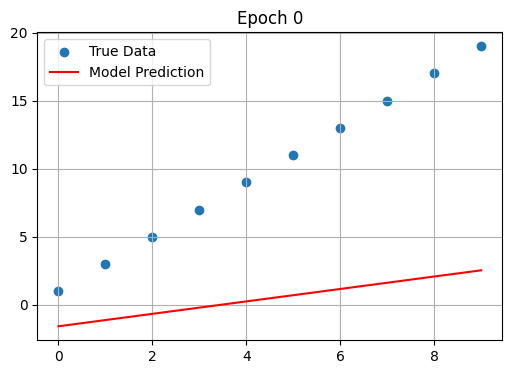

Epoch 20 | Loss = 1.2068 | w = 2.3237, b = -1.0300


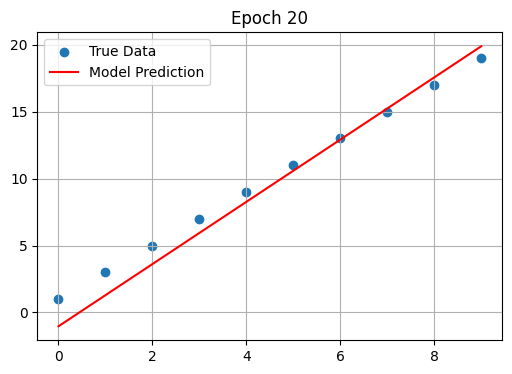

Epoch 40 | Loss = 0.9622 | w = 2.2891, b = -0.8127


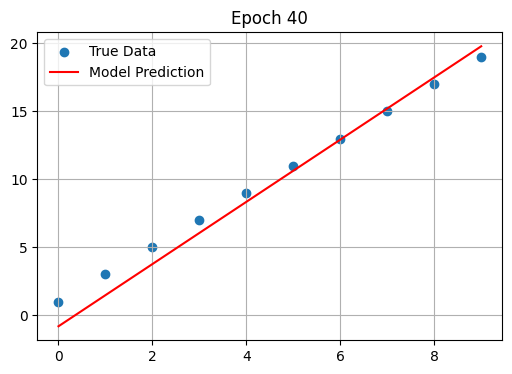

Epoch 60 | Loss = 0.7672 | w = 2.2581, b = -0.6185


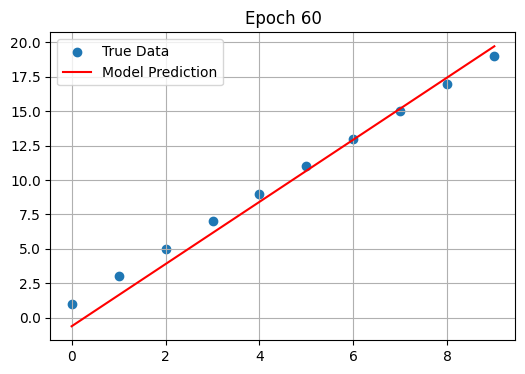

Epoch 80 | Loss = 0.6116 | w = 2.2305, b = -0.4452


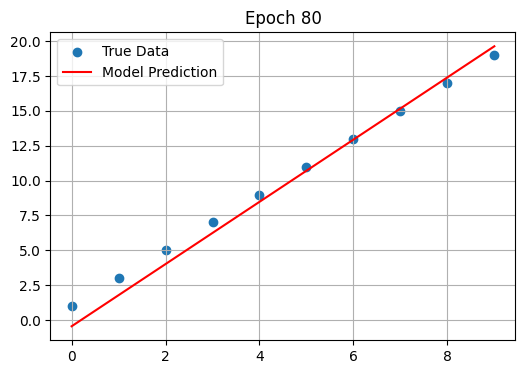

Epoch 99 | Loss = 0.4932 | w = 2.2070, b = -0.2978


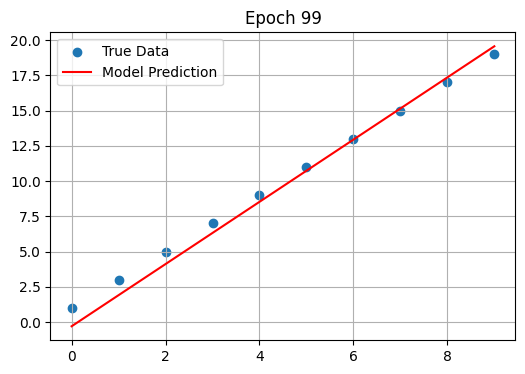

In [11]:
import torch
import matplotlib.pyplot as plt

# === 1. Generate synthetic data ===
x = torch.arange(0, 10, dtype=torch.float32).unsqueeze(1)  # shape: [10, 1]
y = 2 * x + 1  # true relationship

# === 2. Initialize weights and bias ===
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

# === 3. Hyperparameters ===
lr = 0.01
epochs = 100

# === 4. Plot function ===
def plot_model(x, y, w, b, epoch):
    with torch.no_grad():
        y_pred = w * x + b
    plt.figure(figsize=(6, 4))
    plt.scatter(x, y, label='True Data')
    plt.plot(x, y_pred, 'r-', label='Model Prediction')
    plt.title(f"Epoch {epoch}")
    plt.legend()
    plt.grid(True)
    plt.show()

# === 5. Training loop ===
for epoch in range(epochs):
    # Forward pass
    y_pred = w * x + b

    # Compute loss (MSE)
    loss = ((y - y_pred) ** 2).mean()

    # Backward pass
    loss.backward()

    # Update parameters
    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad
        w.grad.zero_()
        b.grad.zero_()

    # Visualize every 20 epochs
    if epoch % 20 == 0 or epoch == epochs - 1:
        print(f"Epoch {epoch} | Loss = {loss.item():.4f} | w = {w.item():.4f}, b = {b.item():.4f}")
        plot_model(x, y, w, b, epoch)


## 🎯 What are weights and biases?

A **weight** tells the model _how strongly_ a given input should affect the output.

A **bias** allows the model to shift the output up or down — it's like an intercept in a line.

### 🧠 Why are they important in ML?

Every layer in a neural network learns:

- A set of **weights** to decide _which inputs matter_
- A *bias* to adjust the output before activation

## ⚙️ PyTorch Equivalent with nn.Linear

This version:

- Uses `nn.Linear(1, 1)` to create a single neuron (1 input → 1 output)
- Tracks weights and bias internally
- Uses an optimizer and loss function for training

Epoch 0 | Loss: 180.7430 | w: 0.9452, b: 1.0501


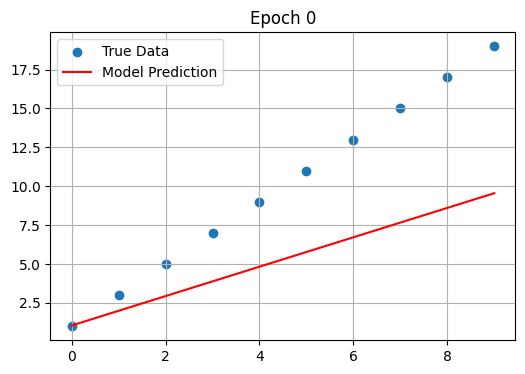

Epoch 20 | Loss: 0.0106 | w: 1.9697, b: 1.1901


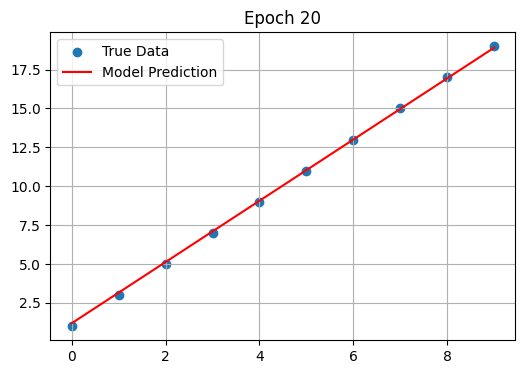

Epoch 40 | Loss: 0.0084 | w: 1.9729, b: 1.1697


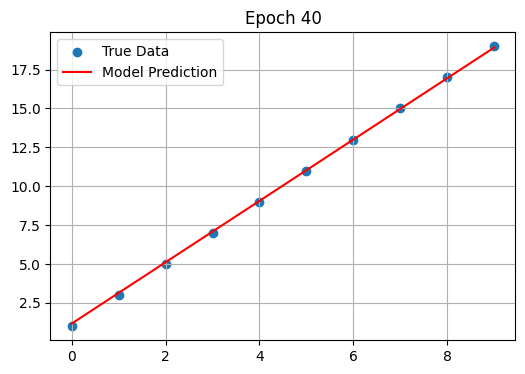

Epoch 60 | Loss: 0.0067 | w: 1.9758, b: 1.1515


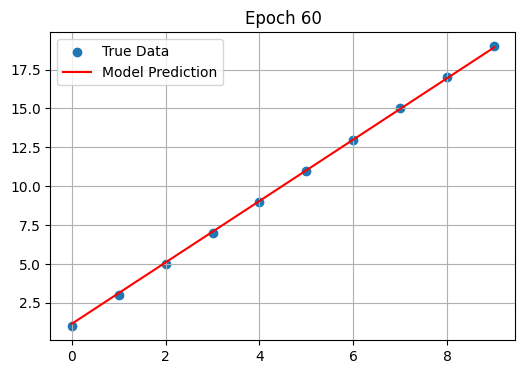

Epoch 80 | Loss: 0.0054 | w: 1.9784, b: 1.1353


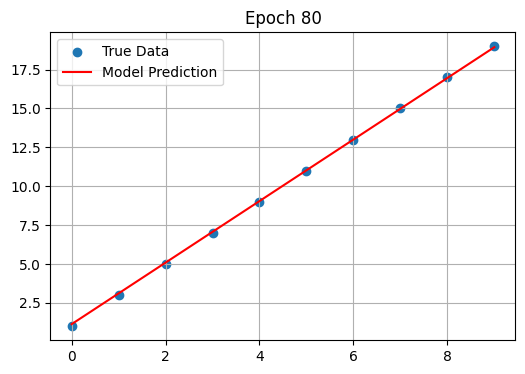

Epoch 99 | Loss: 0.0043 | w: 1.9806, b: 1.1215


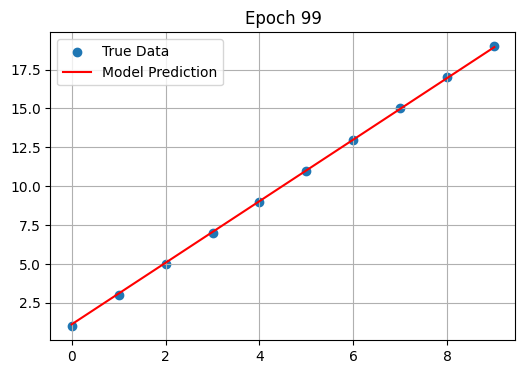

In [13]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# === 1. Data ===
x = torch.arange(0, 10, dtype=torch.float32).unsqueeze(1)  # [10, 1]
y = 2 * x + 1  # ground truth

# === 2. Model ===
model = nn.Linear(1, 1)  # 1 input feature → 1 output feature

# === 3. Loss & Optimizer ===
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# === 4. Plotting function ===
def plot_model(x, y, model, epoch):
    with torch.no_grad():
        y_pred = model(x)
    plt.figure(figsize=(6, 4))
    plt.scatter(x, y, label='True Data')
    plt.plot(x, y_pred, 'r-', label='Model Prediction')
    plt.title(f"Epoch {epoch}")
    plt.grid(True)
    plt.legend()
    plt.show()

# === 5. Training Loop ===
for epoch in range(100):
    y_pred = model(x)  # forward pass
    loss = loss_fn(y_pred, y)  # compute loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 20 == 0 or epoch == 99:
        w, b = model.parameters()
        print(f"Epoch {epoch} | Loss: {loss.item():.4f} | w: {w.item():.4f}, b: {b.item():.4f}")
        plot_model(x, y, model, epoch)
